# Question:  What is the reliability of feelings across people and videos?

In [1]:
import numpy as np
from nltools.data import Adjacency
import pandas as pd
from sklearn.metrics import pairwise_distances

import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.style
import matplotlib as mpl
mpl.style.use('bmh')

//anaconda2/envs/py3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
emotions = ['Afraid', 'Amused', 'Angry', 'Anxious', 'Bored', 'Disgusted',
       'Frustrated', 'Happy', 'Hopeful', 'Inspired', 'Moved', 'Proud',
       'Relieved', 'Sad', 'Surprised', 'Uncomfortable']

stimTranslation = {
    100 : '',
    108 : 'Cops Dont Cry',
    109 : 'Stranger Bonding',
    110 : 'Mortified',
    111 : 'Unexpected Twist',
    112 : 'Gmarks the Spot',
    113 : 'Finding Home',
    114 : 'This Is Going to Suck',
    115 : 'Best of Times',
    116 : ''
}

emotionColors = {
'Amused'  : (0.99,0.01,0.01),
'Happy'  : (0.99,0.25,0.01),
'Surprised'  : (0.99,0.44,0.01),
'Relieved'  : (0.99,0.75,0.01),
'Hopeful'  : (0.99,0.99,0.01),
'Inspired'  : (0.6,0.99,0.01),
'Proud'  : (0.01,0.99,0.56),
'Moved'  : (0.01,0.99,0.89),
'Sad'  : (0.01,0.79,0.99),
'Afraid'  : (0.01,0.44,0.99),
'Anxious'  : (0.22,0.01,0.99),
'Uncomfortable'  : (0.68,0.01,0.99),
'Angry'  : (0.99,0.01,0.91),
'Frustrated'  : (0.99,0.01,0.4),
'Disgusted' : 'brown',
'Bored' : 'gray'}


# Are feelings the same between and within videos?

In [3]:
summary=[]

for stim in range(108,116):
    emo_summary = []

    for emotion in emotions:
        data = pd.read_csv('./cf_data/stim-%s_emo-%s_dilation-60.csv' % (stim, emotion), index_col=0).drop('Emotion', axis=1)
        dist = Adjacency(pairwise_distances(data, metric='correlation'), matrix_type='distance')
        sim = dist.distance_to_similarity()
        emo_summary.append(sim.mean())
        
    summary.append(emo_summary)


In [ ]:
### ^---- To do: plot mar ----^

In [4]:
sdf = pd.DataFrame(summary)
sdf.columns = emotions
sdf = sdf.T

## Feelings vary between participants between each video

Text(0.5, 1.0, 'Average Correlation by Emotion and Video')

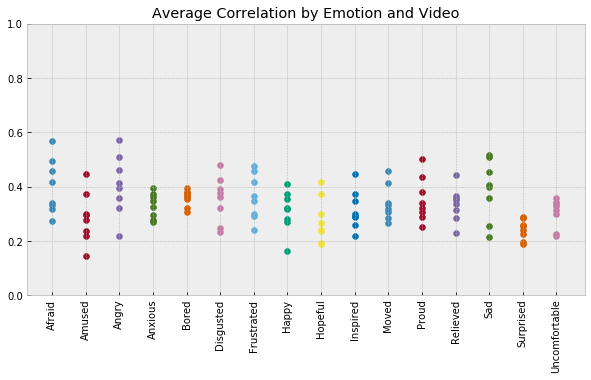

In [5]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,5))

for i in range(len(sdf.index.values)): 
    emo = sdf.index.values[i]
    plt.scatter([emo] * len(sdf.loc[emo,:]), sdf.loc[emo,:])
    
plt.xticks(rotation=90)
plt.ylim(0,1)

plt.title('Average Correlation by Emotion and Video')

### ^---- To do: color by video ----^

## Feelings vary more similarly within each video

Text(0.5, 1.0, 'Average Correlation by Video and Emotion')

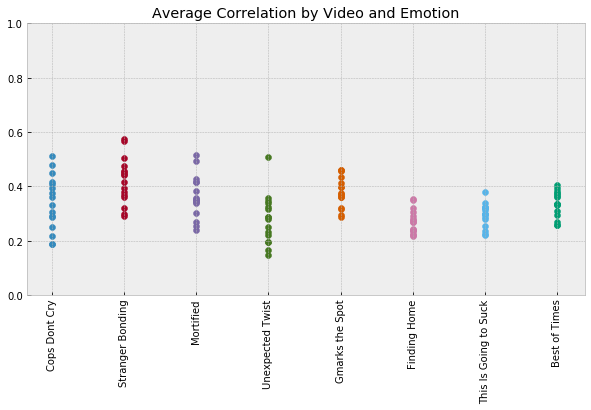

In [6]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,5))

for i in range(8): 
    plt.scatter([i] * len(sdf[i]), sdf[i])
    
plt.ylim(0,1)
plt.xticks(rotation=90)


ax.set_xticklabels(list(stimTranslation.values())); 

plt.title('Average Correlation by Video and Emotion')

### ^---- To do: color by emotion ----^

# Are emotion ratings consistent overall between participants?

In [7]:
# Getting NAN error so dropping all NA's for now
# (will only have scan data and a few mturk participants)
emo_summary = []

for emo in emotions: 
    df = pd.DataFrame()

    for stim in range(108,116): 
        df_add = pd.read_csv('./cf_data/stim-%s_emo-%s_dilation-60.csv' % (stim, emo), index_col=0).drop('Emotion', axis=1)
        df_add = df_add.sub(df_add.mean(axis=1), axis=0)
        df = pd.concat([df, df_add], axis=1, sort=False)
        
    df.dropna(inplace=True)
    dist = Adjacency(pairwise_distances(df, metric='correlation'), matrix_type='distance')
    sim = dist.distance_to_similarity()
    emo_summary.append(sim.mean())


concat = pd.DataFrame(emo_summary).T
concat.columns = emotions

Text(0.5, 1.0, 'Average Correlation by Video (concatenated participants)')

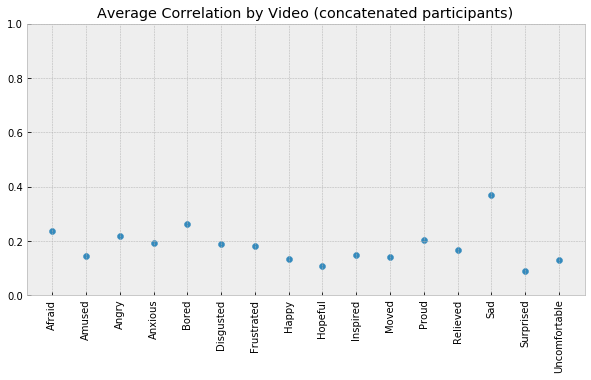

In [8]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,5))
plt.scatter(concat.columns.values, concat)
plt.ylim(0,1)
plt.xticks(rotation=90);
plt.title('Average Correlation by Video (concatenated participants)')